# 1) Setup

In [3]:
#import libraries
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import cm

import numpy as np
import math
import scipy as sp
from scipy import stats
from scipy.stats import kstest
from copy import copy

import pymongo
from pymongo import MongoClient
from datetime import datetime
print("done")



done


In [5]:
#import functions from python files

#1) data import & filtering
from get_data import *
from filter_data import *
from select_data import *
from select_data_edge import *

print("done")

done


In [6]:
#1) Import data from PyMongo
df = get_data()
#2) Preliminary filtering
df = filter_data(df)
#3) Select data of interest
wp1 = "WayPoint69"
wp2 = "WayPoint70" 
edge = wp1 + '_' + wp2
df = select_data_edge(df, edge)
df.head(2)
#independent variable to plot over
t_op = df["operation_time"]

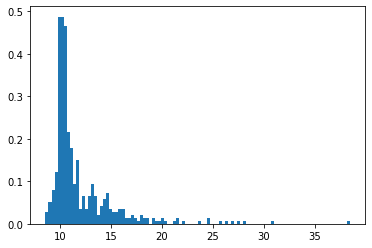

In [10]:
plt.hist(t_op, density = True, bins = 100);

# 2) Common methods
- rvs: Random Variates
- pdf: Probability Density Function
- cdf: Cumulative Distribution Function
- sf: Survival Function (1-CDF)
- ppf: Percent Point Function (Inverse of CDF)
- isf: Inverse Survival Function (Inverse of SF)
- stats: Return mean, variance, (Fisher’s) skew, or (Fisher’s) kurtosis
- moment: non-central moments of the distribution

In [11]:
# value of cdf
stats.norm.cdf(0.5)


0.6914624612740131

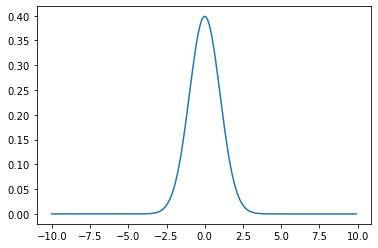

In [15]:
#value of pdf
t_step = 0.1
t_max = 10
t_test = np.arange(-t_max,t_max,t_min)
p_test = stats.norm.pdf(t_test)
plt.plot(t_test, p_test)

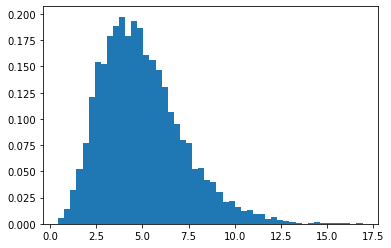

In [30]:
# random variates
t_gen = stats.gamma.rvs(5, size = 10000)
plt.hist(t_gen, density = True, bins = 50);


# 3) Loc, Scale, Shape

- loc and scale (keyword parameters) to adjust the standardised distribution
- e.g. for the standard normal distribution, the location is the mean and the scale is the standard deviation.
- (X - loc) / scale transforms to standardised distribution

- shape are additional parameters
- e.g. a for gamma

In [33]:
stats.gamma.numargs

1

In [35]:
stats.gamma.shapes

'a'

# 4) Broadcasting

In [37]:
#[[10], [11]] is a 2D array for DOF
# If this is instead a 1D array, we calculate element-wise
stats.t.pdf([0.1, 0.05, 0.01], [[10], [11]])

array([[0.38697523, 0.38857379, 0.38908698],
       [0.38786929, 0.38945838, 0.38996849]])

# 5) Fitting distributions

- fit: **MLE** of distribution parameters, including location and scale
- fit_loc_scale: estimation of location and scale when shape parameters are given